In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

c:\users\blazt\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
digits = load_digits()
dir(digits)
print(digits['data'][0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


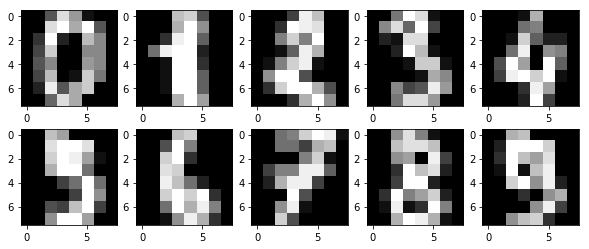

In [9]:
#plot

plt.figure('Digits', figsize = (10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits['images'][i],cmap='gray')

In [18]:
df = pd.DataFrame(digits['data'])
df['target']=digits['target']


In [20]:
x = df.drop(['target'],axis ='columns')
y= df['target']

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
            x,
            y,
            test_size = .1)

In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)

from sklearn.tree import DecisionTreeClassifier
modelT= DecisionTreeClassifier()

#train
model.fit(x_train,y_train)

modelT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
#akurasi
print(model.score(x_train,y_train))

print(modelT.score(x_train,y_train))

1.0
1.0


In [120]:
#prediksi
print(model.predict([x_test.iloc[0]]))
print('aktual', y_test.iloc[0])

[4]
aktual 4


In [121]:
#prediksi
print(modelT.predict([x_test.iloc[0]]))
print('aktual', y_test.iloc[0])

[7]
aktual 4


Text(0.5, 1.0, 'Aktual:4/prediksi:[4]')

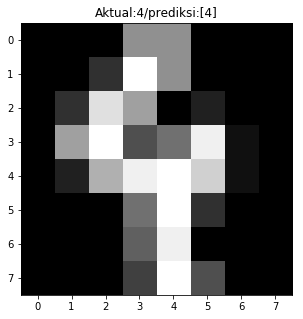

In [122]:
#plotting 
xplot= x_test.iloc[0].values.reshape(8,8)

plt.figure('Digits',figsize=(5,5))
plt.imshow(xplot,cmap='gray')
plt.title('Aktual:{}/prediksi:{}'.format(
            y_test.iloc[0],
            model.predict([x_test.iloc[0]])))